In [1]:
from models import fc
from datasets import mnist
from logger import Logger
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [20]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
batch_size = 256
input_dim = 784
classes = 10
learning_rate = 0.001
reg = 0.01

epochs = 5

In [5]:
def compute_accuracy(model, dataloader):
    
    correct, total = 0.0, 0.0
    
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, pred = torch.max(outputs.data, 1)
        
        correct += torch.eq(pred, labels).sum()
        total += labels.size(0)
    
    return correct/float(total)

In [6]:
train_data, valid_data, test_data = mnist.MNIST.load_data(batch_size)
model = fc.FullyConnected(input_dim, classes)

loss_criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=reg)

In [7]:
losses = []
valid_accs = []
train_accs = []

for epoch in xrange(epochs):
    
    for i, data in enumerate(train_data):
        inputs, labels = data
        inputs = Variable(inputs)
        labels_var = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = loss_criteria(outputs, labels_var)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])
        print "\t Iteration %d : Loss: %f" % (i, loss.data[0])
    
    train_acc = compute_accuracy(model, train_data)
    valid_acc = compute_accuracy(model, valid_data)
    
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    print "Epoch %d complete. Training acc: %f. Validation accuracy: %f" % (epoch, train_acc, valid_acc)

	 Iteration 0 : Loss: 2.290452
	 Iteration 1 : Loss: 2.161052
	 Iteration 2 : Loss: 2.038410
	 Iteration 3 : Loss: 1.969780
	 Iteration 4 : Loss: 1.919928
	 Iteration 5 : Loss: 1.854353
	 Iteration 6 : Loss: 1.827614
	 Iteration 7 : Loss: 1.769839
	 Iteration 8 : Loss: 1.752747
	 Iteration 9 : Loss: 1.695619
	 Iteration 10 : Loss: 1.651019
	 Iteration 11 : Loss: 1.621802
	 Iteration 12 : Loss: 1.593323
	 Iteration 13 : Loss: 1.557758
	 Iteration 14 : Loss: 1.555771
	 Iteration 15 : Loss: 1.493719
	 Iteration 16 : Loss: 1.463814
	 Iteration 17 : Loss: 1.421013
	 Iteration 18 : Loss: 1.412539
	 Iteration 19 : Loss: 1.377439
	 Iteration 20 : Loss: 1.308357
	 Iteration 21 : Loss: 1.334865
	 Iteration 22 : Loss: 1.330073
	 Iteration 23 : Loss: 1.293322
	 Iteration 24 : Loss: 1.272699
	 Iteration 25 : Loss: 1.244351
	 Iteration 26 : Loss: 1.214759
	 Iteration 27 : Loss: 1.188855
	 Iteration 28 : Loss: 1.152511
	 Iteration 29 : Loss: 1.174454
	 Iteration 30 : Loss: 1.117444
	 Iteration 31 : L

In [8]:
test_acc = compute_accuracy(model, test_data)
print "Test accuracy: %f" % (test_acc)

Test accuracy: 0.970400


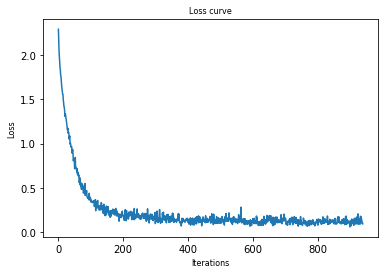

In [9]:
# Plot loss

plt.plot(losses)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.title('Loss curve', fontsize=8)
plt.savefig('results/1-fc-mnist/loss_curve.png')

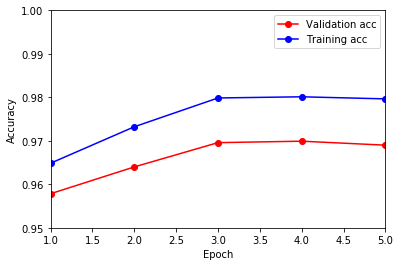

In [10]:
# Plot validation and train accuracy

plt.plot(range(1, epochs+1), valid_accs, 'r-o')
plt.plot(range(1, epochs+1), train_accs, 'b-o')
plt.xlim(1, epochs)
plt.ylim(0.95, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation acc', 'Training acc'])
plt.savefig('results/1-fc-mnist/train_val_acc.png')

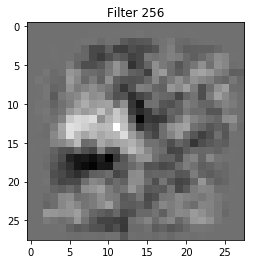

In [11]:
# Visualize FC1 weights

fc1_weight = model.state_dict()['fc1.weight']
fc1_img = fc1_weight.view(-1, 28, 28)
img_size = fc1_img.shape[0]

for i in xrange(img_size):
    filter_img = fc1_img[i-1]
    
    plt.imshow(filter_img.numpy(), cmap='gray')
    plt.title('Filter %d' % (i+1))
    plt.savefig('results/1-fc-mnist/fc1-vis/filter-%d.png' % (i+1))

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [16]:
# fc4 stores the hidden 64-dimensional encoding of the images. Visualize using t-SNE

img_labels = np.array([])
raw_outputs = np.array([])

def capture_fc4_out(model, inputs):
    global raw_outputs
    input_np = inputs[0].data.numpy()
    
    if raw_outputs.shape[0] <= 0:
        raw_outputs = input_np
    else:
        raw_outputs = np.append(raw_outputs, input_np, axis=0)
    

hook_handle = model.fc4.register_forward_pre_hook(capture_fc4_out)
cnt = 0

try:
    for i, data in enumerate(test_data):

        inputs, labels = data
        inputs = Variable(inputs)

        output = model(inputs)

        if img_labels.shape[0] <= 0:
            img_labels = labels.numpy()
        else:
            img_labels = np.append(img_labels, labels.numpy())

        cnt += labels.shape[0]
        print "%d processed" % cnt
finally:
    hook_handle.remove()

print "Running TSNE"
fc4_tsne_codes = TSNE(n_components=2).fit_transform(raw_outputs)
print fc4_tsne_codes.shape

print "Running PCA"
fc4_pca_codes = PCA(n_components=2).fit_transform(raw_outputs)

print fc4_pca_codes.shape 
print img_labels.shape

256 processed
512 processed
768 processed
1024 processed
1280 processed
1536 processed
1792 processed
2048 processed
2304 processed
2560 processed
2816 processed
3072 processed
3328 processed
3584 processed
3840 processed
4096 processed
4352 processed
4608 processed
4864 processed
5120 processed
5376 processed
5632 processed
5888 processed
6144 processed
6400 processed
6656 processed
6912 processed
7168 processed
7424 processed
7680 processed
7936 processed
8192 processed
8448 processed
8704 processed
8960 processed
9216 processed
9472 processed
9728 processed
9984 processed
10000 processed
(10000, 64)
(10000, 2) (10000, 2) (10000,)


In [27]:
np.save('results/1-fc-mnist/fc_out_tsne/tsne_embedding', fc4_tsne_codes)
np.save('results/1-fc-mnist/fc_out_tsne/pca_embedding', fc4_pca_codes)

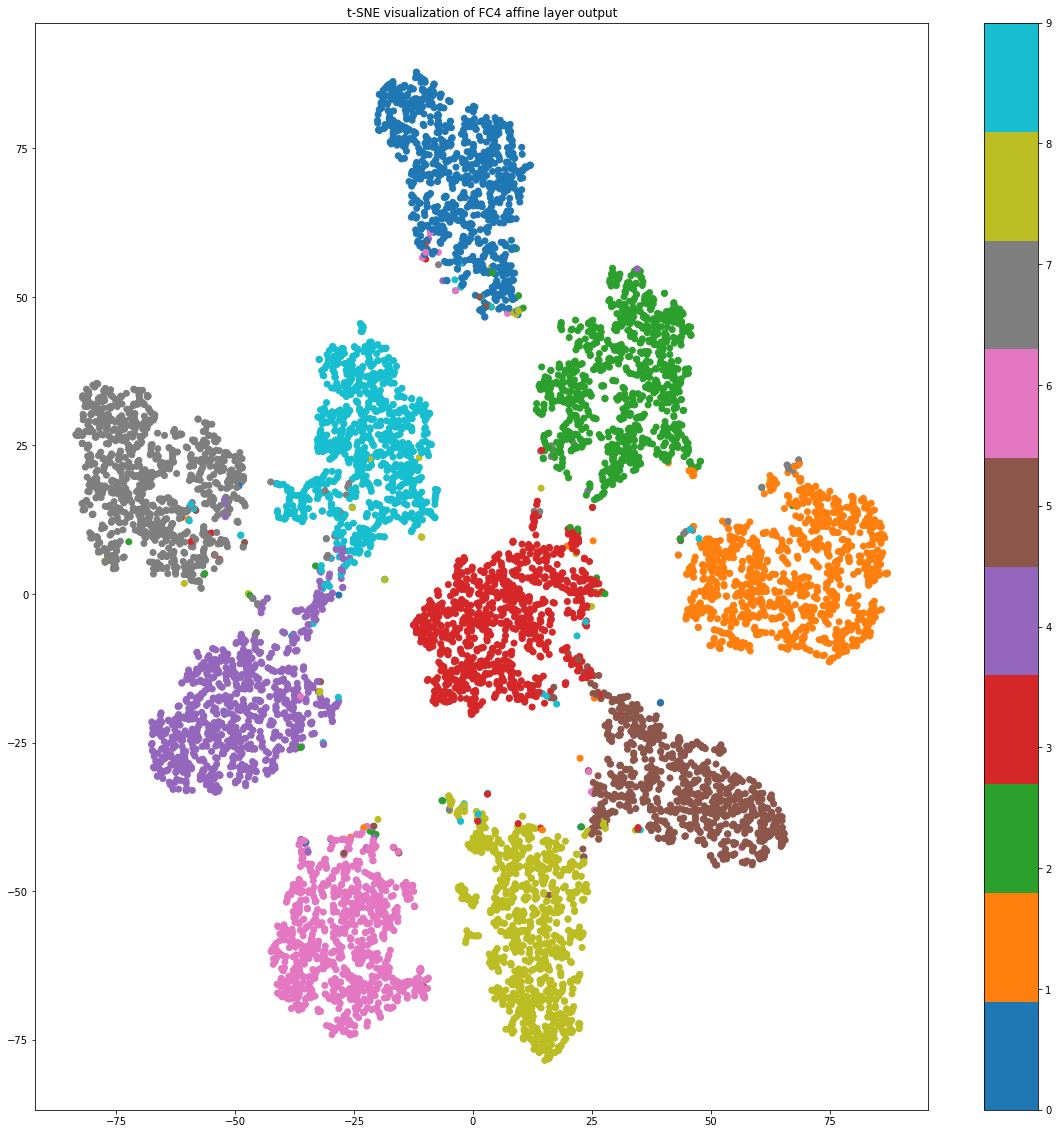

In [32]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_tsne_codes[:,0], fc4_tsne_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('t-SNE visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/tsne_fc4_output.png')

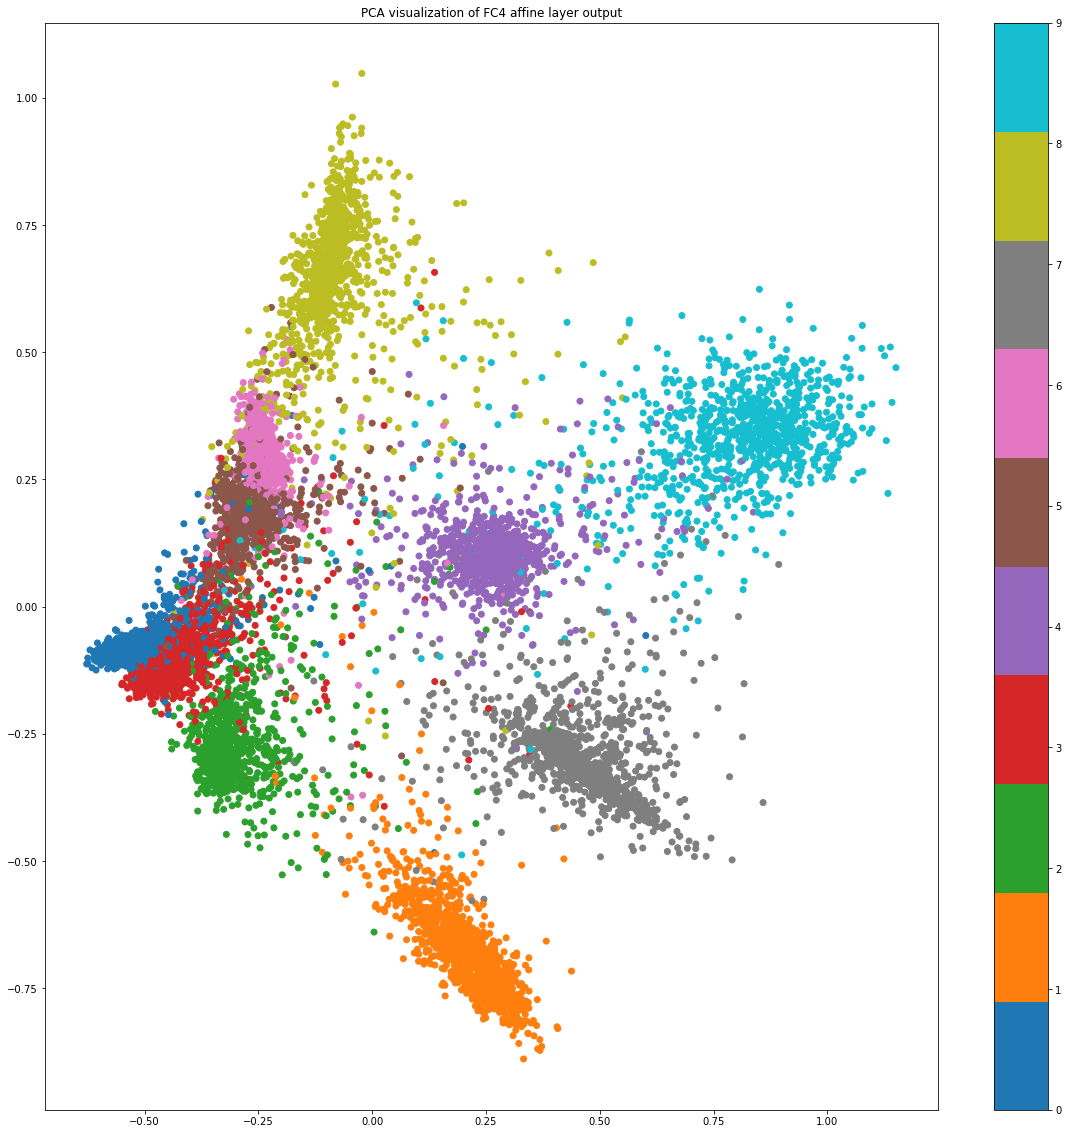

In [33]:
colormap = matplotlib.cm.get_cmap('Vega10')

plt.figure(figsize=(20, 20))
plt.scatter(fc4_pca_codes[:,0], fc4_pca_codes[:, 1], c=img_labels, cmap=colormap)
plt.colorbar()
plt.title('PCA visualization of FC4 affine layer output')
plt.savefig('results/1-fc-mnist/fc_out_tsne/pca_fc4_output.png')